# **Exploratory Analysis and Visualization** 

### ***By Het Naik, CE18***

I have taken the examples of the ongoing pandemic as it seems fairly relevant.

Also, I have taken minimalistic data to understand the graphs and visualize them in a simple way

NOTE: I have not taken help from Internet and not directly downloaded any csv file from it, and therefore I have assumed and initialised every data in the code snippets itself

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### ***1. Linear Plot***
Description : 
1. Comparison of COVID19 positive cases Between India and China from months February to June
2. Amplitude sin function

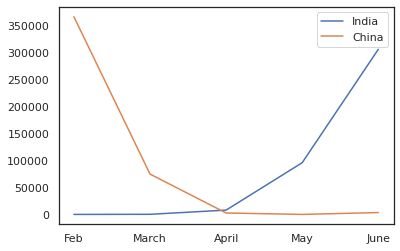

In [ ]:
#month
x = ["Feb",'March','April','May','June']
#cases in India
y = [5,200,7970,95675,305464]
#cases in China
z = [365777,74657,2656,4,3445]
#plotting x v/s y,z
plt.plot(x,y,x,z)
plt.legend(['India', 'China'])   
plt.show()

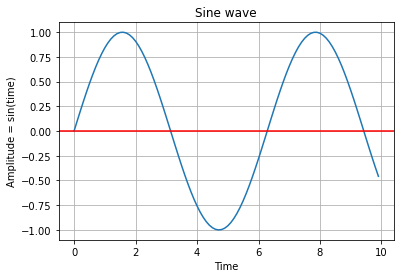

In [ ]:
time = np.arange(0, 10, 0.1) #t: 0 to 10 seconds
amplitude   = np.sin(time) 
plt.plot(time, amplitude) 
plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both') #apply grid in the bg
plt.axhline(y=0, color='red') 
plt.show()

### ***2. Bar Chart***
Description:

Comaprison of the COVID19 cases between India, China and USA in the last 4 months

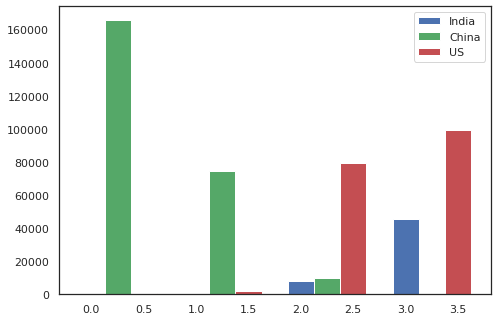

In [ ]:
data = [[5,200,7970,45675], # India
[165777,74657,9656,502], # China
[523,2030,79370,99565]] # USA

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
#print(X+0.00)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
#print(X+0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
#print(X+0.50)
ax.legend(labels=['India', 'China','US'])



### ***3 Pie and Donut Charts***
Description:

Comparison in the problems faced by different classes of people of India, China and USA during the pandemic

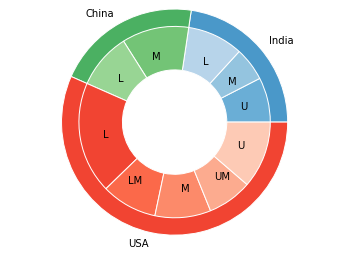

In [ ]:
group_names=['India', 'China', 'USA']
group_size=[12,11,30]

#Family Class : U: Upper,M: Middle,L: Lower
subgroup_names=['U', 'M', 'L', 'M', 'L', 'L', 'LM', 'M', 'UM', 'U']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
a, b, c=[plt.cm.Blues,  plt.cm.Greens,plt.cm.Reds]

#Outer cirlce
fig, ax = plt.subplots()
#print(fig,ax)
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white') 

#Inner circle 
mypie2, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)
plt.show()


### ***4 Histograms***
Description:

1 Using seaborn - distplot for 10 random values

2 Using pandas - Mortality rate for China and Italy due to COVID19

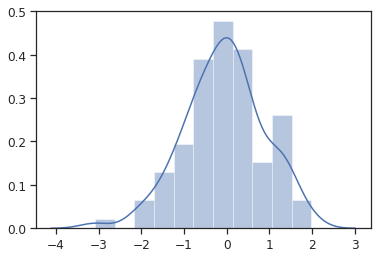

In [ ]:
# 1 - using seaborn
x = np.random.randn(100)
#print(x)
ax = sns.distplot(x)

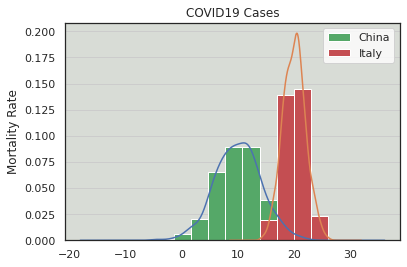

In [ ]:
# 2 - using pandas

means = 10, 20
stdevs = 4, 2
#print(means)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['China', 'Italy'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='COVID19 Cases')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Mortality Rate')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

### ***5 Scatter Plot***
Description:
Comaprison of number of deaths in a month, if it is caused due to COVID19 or not

In [ ]:
df = pd.DataFrame()

df['Date'] =[i for i in range(1,32)]
#print(df['Date'])
df['Deaths'] =[random.randint(1,1000) for i in range(31)]
#print(df['Deaths']) 

#COVID RESULT : 1 for positive, 0 for negative
df['Covid Result'] = [random.randint(0,1) for i in range(31)]
df

,Date,Deaths,Covid Result
0,1,627,0
1,2,531,1
2,3,958,1
3,4,777,1
4,5,550,0
5,6,939,1
6,7,163,1
7,8,637,1
8,9,658,1
9,10,531,1


Text(44.021612375000004, 0.5, 'Deaths')

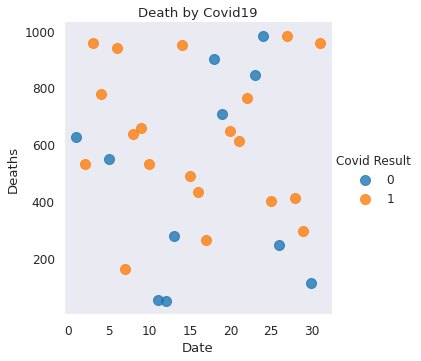

In [ ]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("dark")
sns.lmplot('Date', 
           'Deaths',
           data=df, 
           fit_reg=False,
           hue="Covid Result",
           scatter_kws={"marker": "D", 
                        "s": 100}) # S marker size

plt.title('Death by Covid19')
plt.xlabel('Date')
plt.ylabel('Deaths')


## ***6 KDE for non-parametric data***
Description:

COVID 19 cases for a particular span in India

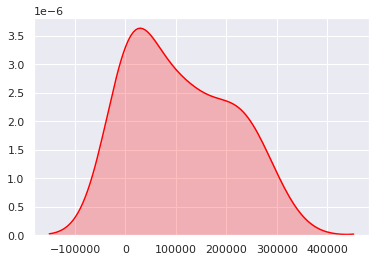

In [ ]:
data = [5,34,200,565,1222,3456,5573,7970,9909,13876,16743,21234,34567,40988,45675,76852,85032,96821,102145,110154,119878,120969,128245,145252,160245,175021,196656,202141,217548,223698,228454,236741,249845,258167,282151,301545] # India
#print(data)
res = sn.kdeplot(data,color='red',shade=True)
plt.show()

## ***7 Box(and whisker) plots***
Description:

Life expectancy of people of different countries before COVID19

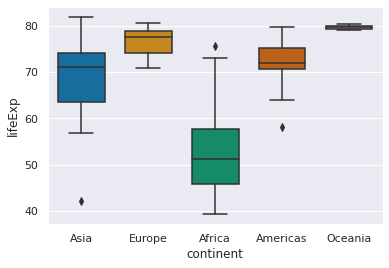

In [ ]:
gapminder = pd.read_csv('http://bit.ly/2cLzoxH')
#print(gapminder.head(3))
bplot = sns.boxplot(y='lifeExp', x='continent', 
                 data=gapminder[gapminder['year']==2002], 
                 width=0.7,
                 palette="colorblind")

## ***8 Network Graphs***
Description:
# New Section
Transmission chances of COVID19 among people due to COMMUNITY TRANSMISSION


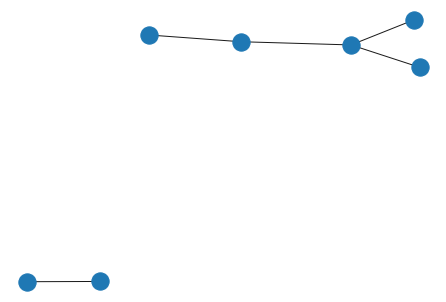

In [ ]:
G=nx.Graph()
G.add_node("p1")
G.add_nodes_from(["p2","p3"])

G.add_edge(1,2)
edge = ("p4", "p5")
G.add_edge(*edge)
edge = ("p1", "p2")
G.add_edge(*edge)

G.add_edges_from([("p1","p3"),("p1",2),("p1",2)])

nx.draw(G)
plt.show() 


## ***9 Correlation Matrix***
Descripton: Comparison for the number of infected people due to COVID19 in 3 majorly infected countries - India, China and USA 

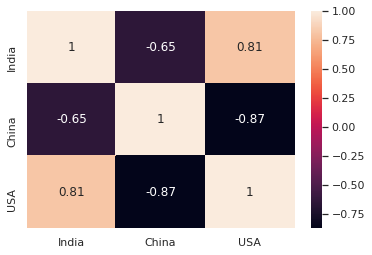

In [ ]:
data = {'India': [5,200,7970,45675],
        'China': [165777,74657,9656,502],
        'USA':[523,2030,79370,99565]
        }
df = pd.DataFrame(data,columns=['India','China','USA'])

corrMatrix = df.corr()
#mask = np.tril(np.ones_like(corr, dtype=np.bool))
sn.heatmap(corrMatrix, annot=True)
plt.show()